# Titanic Survival Prediciton using NumPy

This notebook implements a binary classification model to predict passenger survival on the Titanic, using only NumPy. It includes data cleaning, data analysis, model traning with gradient descent, and loss visualization.

The goal of this project is to understand concepts like feature normalization, binary cross-entropy loss, gradient descent, and sigmoid activation

In [236]:
import pandas


In [237]:
df = pandas.read_csv("./titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [239]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [240]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [241]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [242]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

# Data Cleaning

We drop irrelevant columns, fill missing values, and encode categorical features to prepare the dataset for numerical modeling


In [243]:
df = df.drop(columns=["Ticket", "Name", "Cabin"])

df["Age"] = df["Age"].fillna(df["Age"].median())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df["Sex"] = df["Sex"].map({"male" : 0, "female" :1})

df = pandas.get_dummies(df, columns=["Embarked"], drop_first=True)


df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


In [245]:
import numpy


features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked_Q", "Embarked_S"]


X = df[features].apply(pandas.to_numeric, errors="coerce").astype(numpy.float32).to_numpy()

y = df["Survived"].astype(numpy.float64).values.reshape(-1, 1)


X = (X - X.mean(axis=0))/X.std(axis=0)

In [246]:


numpy.random.seed(42)
rows, columns = X.shape


weight = numpy.random.randn(columns, 1)
bias = 0

# Logistic Regression

Using sigmoid activation to calcualte probability output, binary cross-entropy loss for classification cost, and gradient descent to update weight

In [247]:
def sigmoid(z):
    return 1/(1 + numpy.exp(-z))

def compute_loss(y, y_hat):
    epsilon = 1e-9
    return -numpy.mean(y * numpy.log(y_hat + epsilon) + (1 - y) * numpy.log(1 - y_hat + epsilon))

In [248]:
def gradient_descent(X, y, weight, bias, lr, epochs):
    losses = []
    for i in range(epochs):
        raw_score = numpy.dot(X, weight) + bias
        y_hat = sigmoid(raw_score)
        loss = compute_loss(y, y_hat)
        losses.append(loss)

        dw = numpy.dot(X.T, (y_hat - y)) / rows
        db = numpy.mean(y_hat - y)

        weight -= lr * dw
        bias -= lr * db

        if i % 100 == 0:
            print(f"Epoch {i} > loss : {loss:.4f}")

    return weight, bias, losses

In [249]:
weight_trained, bias_trained, losses = gradient_descent(X, y, weight, bias, lr = 0.1, epochs=1000)

Epoch 0 > loss : 0.9857
Epoch 100 > loss : 0.5121
Epoch 200 > loss : 0.4701
Epoch 300 > loss : 0.4558
Epoch 400 > loss : 0.4486
Epoch 500 > loss : 0.4447
Epoch 600 > loss : 0.4426
Epoch 700 > loss : 0.4416
Epoch 800 > loss : 0.4411
Epoch 900 > loss : 0.4409


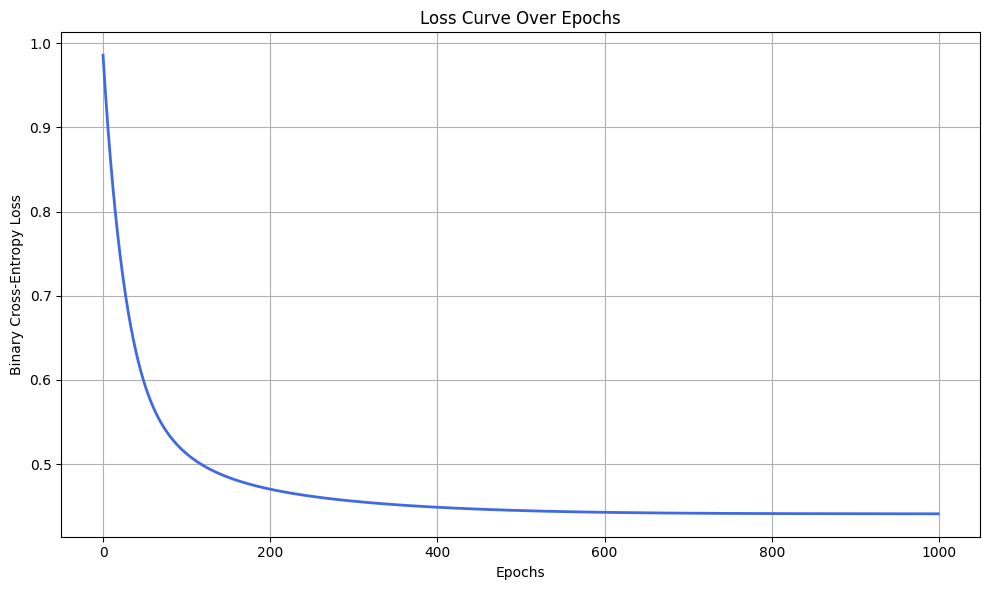

In [250]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses, color="royalblue", linewidth=2)
plt.title("Loss Curve Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

In [251]:
z = numpy.dot(X, weight_trained) + bias_trained
y_pred_prob = sigmoid(z)

y_pred = (y_pred_prob > 0.5).astype(int)

In [252]:
accuracy = numpy.mean(y_pred == y)
print(f"Model accuracy on training data: {accuracy:.4f}")

Model accuracy on training data: 0.7980


# Results

The final training accuracy is 79.80%. This baseline model uses simple features and no external ML libraries